In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset
file_path = 'C:\\Users\\User\\Desktop\\AASE\\datasets\\apartments_for_rent_classified_100K.csv'
data = pd.read_csv(file_path, sep=';')

In [3]:
# Selecionar features e target
features = [
    "bathrooms", "bedrooms", "square_feet", "pets_allowed_transformed", "has_photo_transformed", "cityname", "AC", 
    "Alarm", "Basketball", "Cable or Satellite", "Clubhouse", "Dishwasher", "Doorman", 
    "Elevator", "Fireplace", "Garbage Disposal", "Gated", "Golf", "Gym", "Hot Tub", 
    "Internet Access", "Luxury", "Parking", "Patio/Deck", "Playground", "Pool", 
    "Refrigerator", "Storage", "TV", "Tennis", "View", "Washer Dryer", "Wood Floors"
]
target = "price"

X = data[features]
y = data[target]

# Tratar valores ausentes na variável target
y = y.fillna(y.mean())

In [4]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Identificar colunas numéricas e categóricas
numeric_features = ["bathrooms", "bedrooms", "square_feet"]
categorical_features = [
    "pets_allowed_transformed", "has_photo_transformed", "cityname", 
    "AC", "Alarm", "Basketball", "Cable or Satellite", "Clubhouse", "Dishwasher", "Doorman", 
    "Elevator", "Fireplace", "Garbage Disposal", "Gated", "Golf", "Gym", "Hot Tub", 
    "Internet Access", "Luxury", "Parking", "Patio/Deck", "Playground", "Pool", 
    "Refrigerator", "Storage", "TV", "Tennis", "View", "Washer Dryer", "Wood Floors"
]

In [6]:
# Preprocessamento para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [7]:
# Preprocessamento para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [8]:
# Combinar pré-processadores em um transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [9]:
# Criar pipeline com árvore de decisão
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

In [10]:
# Hiperparâmetros para otimização
param_grid = {
    "regressor__max_depth": [5, 10, 15, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

In [11]:
# GridSearchCV para encontrar os melhores hiperparâmetros
search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
search.fit(X_train, y_train)

In [ ]:
# Melhor modelo
best_model = search.best_estimator_

In [ ]:
# Fazer previsões com o melhor modelo
y_pred = best_model.predict(X_test)

In [ ]:
# Avaliar modelo
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
nmae = (mae / y_test.mean()) * 100

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Normalized Mean Absolute Error (NMAE): {nmae:.2f}%")

Mean Squared Error: 295766.12508294825
Mean Absolute Error: 295.6509126775428
Normalized Mean Absolute Error (NMAE): 19.38%


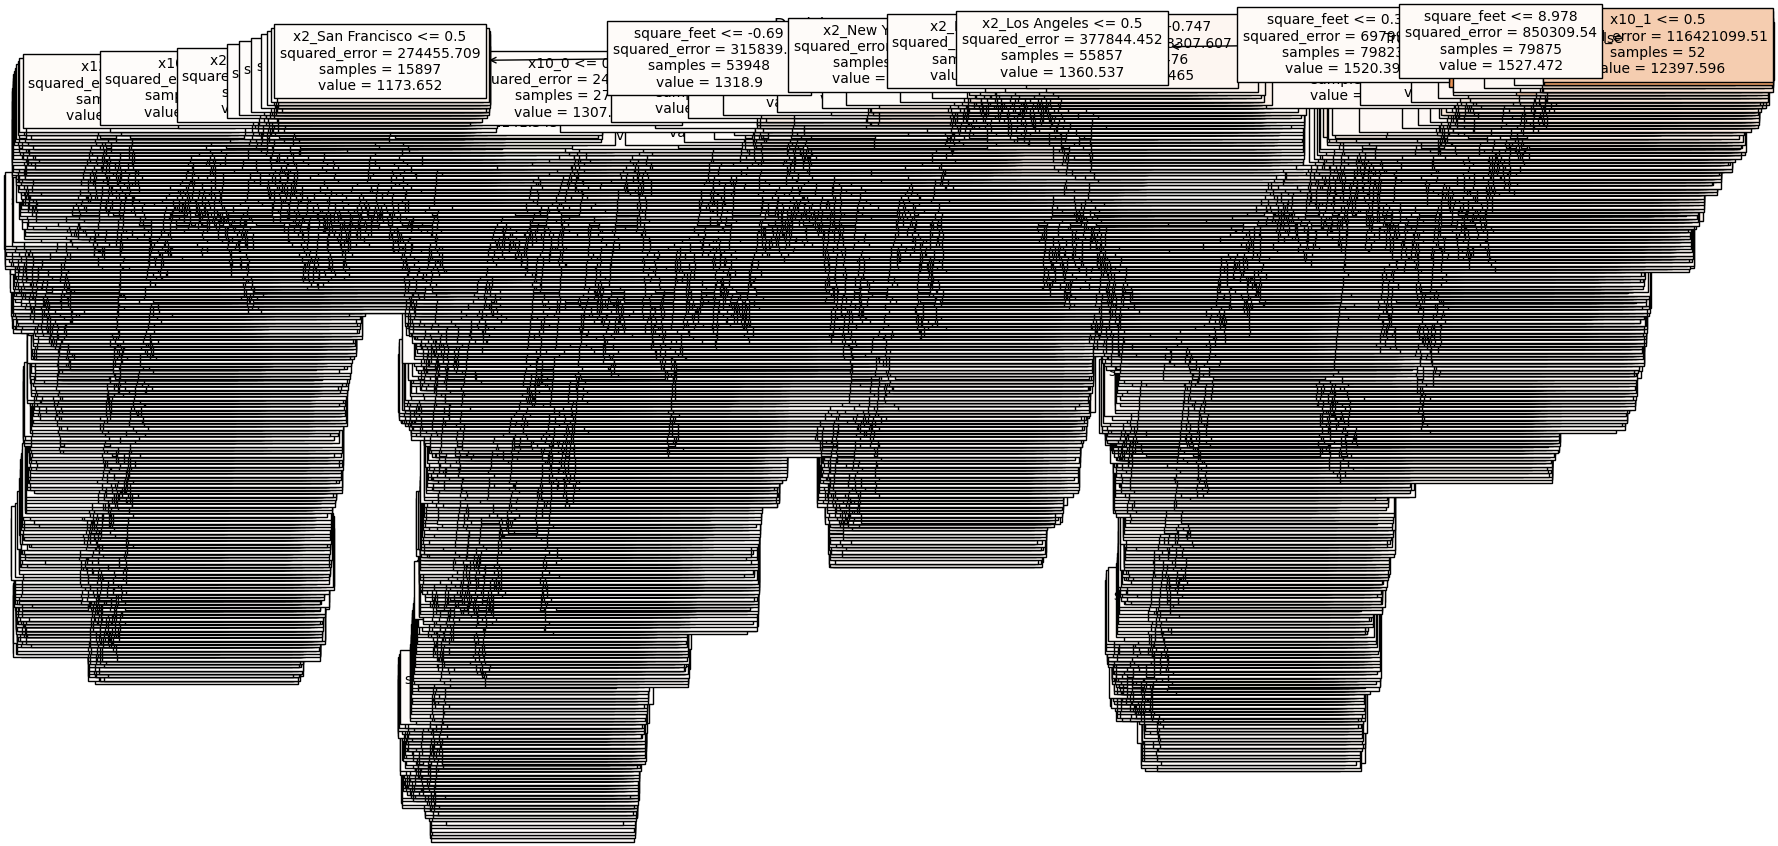

In [ ]:
# Visualizar a árvore de decisão
# Ajustar pipeline com os dados de treino para recuperar nomes das features transformadas
best_model.named_steps["preprocessor"].fit(X_train)
transformed_features = numeric_features + list(best_model.named_steps["preprocessor"].transformers_[1][1].named_steps["onehot"].get_feature_names_out())

decision_tree = best_model.named_steps["regressor"]
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=transformed_features, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()
